# Simulating risk data

*Author: Miao Cai* [miao.cai@slu.edu](miao.cai@slu.edu)

## Data generating process

The data generating process of real-life transportation risk is very complex. As an illustrating example, here we assume that the risk was generated from a Poisson distribution with the following data generating process:

\begin{align}
Y_i & \sim \text{Poisson}(d_i\cdot\lambda_i)\\
\log(\lambda_i) & = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i}  + \epsilon_i \\
\epsilon_i & \sim \text{Normal}(0, 2^2),
\end{align}

where $d_i$ is the distance traveled in the $i$-th trip, $x_1$ is precipitation, and $x_2$ is road traffic.

We assume the sample size $N = 10,000$ and the parameters and data has following values or distributions:

- $\beta_0 = -3$,
- $\beta_1 = 0.5$,
- $\beta_2 = 0.9$,
- $d \sim \text{Poisson}(1000)$
- $x_1 \sim \text{Bernoulli}(0.15)$,
- $x_2 \sim \text{Beta}(2, 2)$

## Simulating data
### Import packages and print package version

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import sys

print("Python version: " + sys.version)
print("pandas version: " + pd.__version__)
print("numpy version: " + np.__version__)

Python version: 3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]
pandas version: 0.25.3
numpy version: 1.17.4


### set parameters and generate data

In [2]:
def simulate_distance(N_size):
    return(np.random.poisson(lam = 1000, size = N_size))
def simulate_precipitation(N_size):
    return(np.random.binomial(n = 1, p = 0.15, size = N_size))
def simulate_traffic(N_size):
    return(np.random.beta(a = 2, b = 2, size = N_size))

In [3]:
np.random.seed(123) # set random seed
N = 10**4
b0, b1, b2 = -10, 0.5, 0.9

d = simulate_distance(N)
x1 = simulate_precipitation(N)
x2 = simulate_traffic(N)
epsilon = np.random.normal(loc = 0, scale = 1, size = N)

lambda_i = np.exp(b0 + b1*x1 + b2*x2 + epsilon)
y = np.random.poisson(d*lambda_i)

### Plot distributions of simulated data

In [4]:
# The distribution of y
from collections import Counter
print("The maximum potential crash in a trip is " + str(max(y)))
print("The distribution of y is: \n" + str(Counter(y)))

The maximum potential crash in a trip is 5
The distribution of y is: 
Counter({0: 8910, 1: 937, 2: 117, 3: 24, 4: 6, 5: 6})


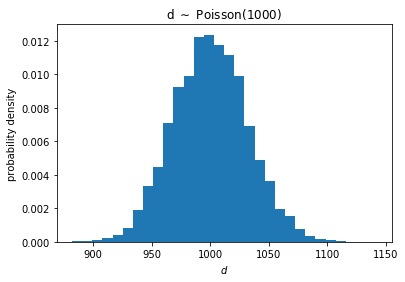

In [5]:
# The distribution of d
from scipy.special import factorial
count, bins, ignored = plt.hist(d, 30, density=True)
plt.title("d $\sim$ Poisson$(1000)$")
plt.xlabel('$d$')
plt.ylabel('probability density')
plt.show()

In [6]:
# The distribution of x1
Counter(x1)

Counter({0: 8508, 1: 1492})

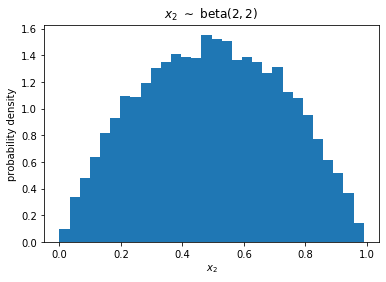

In [7]:
# The distribution of x2
count, bins, ignored = plt.hist(x2, 30, density=True)
plt.title("$x_2$ $\sim$ beta$(2,2)$")
plt.xlabel('$x_2$')
plt.ylabel('probability density')
plt.show()

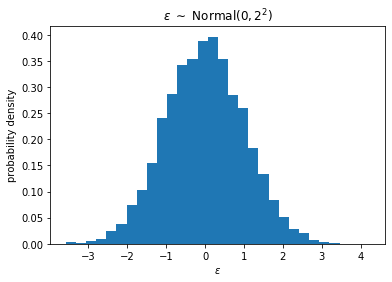

In [8]:
# The distribution of $\epsilon$
count, bins, ignored = plt.hist(epsilon, 30, density=True)
plt.title("$\epsilon$ $\sim$ Normal$(0,2^2)$")
plt.xlabel('$\epsilon$')
plt.ylabel('probability density')
plt.show()

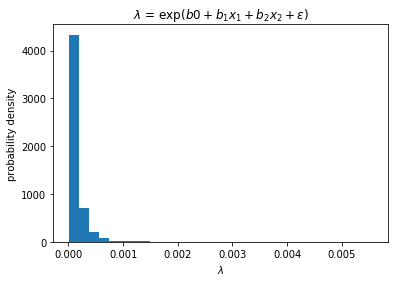

In [9]:
# The distribution of $\lambda$
count, bins, ignored = plt.hist(lambda_i, 30, density=True)
plt.title("$\lambda$ = exp($b0 + b_1x_1 + b_2x_2 + \epsilon$)")
plt.xlabel('$\lambda$')
plt.ylabel('probability density')
plt.show()

## Create and save dataframe

In [10]:
df = pd.DataFrame({
    'y': y, 
    'Distance': d, 
    'Precipitation': x1, 
    'Traffic': x2
})
df.head(10)

,y,Distance,Precipitation,Traffic
0,0,1018,0,0.299886
1,0,973,0,0.565617
2,0,1021,0,0.414564
3,0,998,0,0.559767
4,0,985,0,0.777217
5,0,994,0,0.716722
6,0,991,0,0.782984
7,1,967,0,0.587694
8,0,1003,0,0.595906
9,0,1012,0,0.742293


In [11]:
df.to_csv("data/simulated_data.csv", sep=',', encoding='utf-8')

## Simulate precipitation and traffic variables for links data

In [12]:
links = pd.read_csv('data/links.csv')
links.head(20)

,# Node A,Node Z,Distance
0,Ann_Arbor,Ithaca,800
1,Ann_Arbor,Princeton,800
2,Ann_Arbor,Salt_Lake_City,2400
3,Atlanta,Houston,1200
4,Atlanta,Pittsburgh,900
5,Boulder,Houston,1100
6,Boulder,Lincoln,800
7,Boulder,Salt_Lake_City,600
8,Champaign,Lincoln,700
9,Champaign,Pittsburgh,700


In [13]:
np.random.seed(0)
links['Precipitation'] = simulate_precipitation(links.shape[0])
links['Traffic'] = simulate_traffic(links.shape[0])
links.head(20)

,# Node A,Node Z,Distance,Precipitation,Traffic
0,Ann_Arbor,Ithaca,800,0,0.254345
1,Ann_Arbor,Princeton,800,0,0.243435
2,Ann_Arbor,Salt_Lake_City,2400,0,0.254188
3,Atlanta,Houston,1200,0,0.424037
4,Atlanta,Pittsburgh,900,0,0.573477
5,Boulder,Houston,1100,0,0.834188
6,Boulder,Lincoln,800,0,0.190679
7,Boulder,Salt_Lake_City,600,1,0.689211
8,Champaign,Lincoln,700,1,0.507221
9,Champaign,Pittsburgh,700,0,0.129693


In [14]:
links.to_csv("data/links_traffic_precipitation.csv", sep=',', encoding='utf-8')